### Model Training and Improvement

In [1]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.datasets import load_digits
from skimage.io import imread

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
imread("./data/A/MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png")

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  53,  72,  90,
        136, 183, 170,  72,   0,   2,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  37, 176, 226, 250, 255, 255,
        255, 255, 254, 255, 141,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,  60, 248, 255, 254, 255, 253,
        252, 253, 252, 251, 255, 138,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,  19,  82, 139, 251, 255,
        255, 255, 255, 254, 252, 255,  80,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   2,   0, 142, 255, 253,
        255, 255, 255, 255, 253, 255, 215,  11,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0, 115, 255, 252, 255,
        255, 255, 255, 255, 255, 251, 255, 109,   0,   4,   0,   0,   0,
          0,   0],
       [  

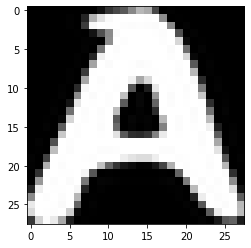

In [6]:
plt.imshow(imread("./data/A/MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png"), cmap="gray")

In [7]:
BASE_DIR = "./data/"
MAX_N_IMAGES = 50

In [8]:
os.listdir("./data/")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [9]:
image_classes = os.listdir(BASE_DIR)

In [10]:
[os.path.join(BASE_DIR, image_class) for image_class in image_classes]

['./data/A',
 './data/B',
 './data/C',
 './data/D',
 './data/E',
 './data/F',
 './data/G',
 './data/H',
 './data/I',
 './data/J']

In [11]:
directories = [os.path.join(BASE_DIR, image_class) for image_class in image_classes]

In [12]:
all_images = []
all_classes = []

for image_class, directory in zip(image_classes, directories):
    images = os.listdir(directory)[:MAX_N_IMAGES]
    full_path = [os.path.join(directory, image_path) for image_path in images]
    
    all_images += [imread(img) for img in full_path]
    all_classes += [image_class] * MAX_N_IMAGES

In [13]:
len(all_images)

500

In [14]:
all_images = np.array(all_images)

In [15]:
all_classes = np.array(all_classes)

In [16]:
all_classes

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D

In [17]:
all_images

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ 43, 183, 251, ..., 255, 125,  40],
        [ 43, 120, 126, ..., 179,  82,  12],
        [  4,  25,  32, ...,   8,  77,  13]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [233, 255, 255, ..., 251, 255, 185],
        [217, 255, 254, ..., 255, 255, 189],
        [ 57, 211, 252, ...,  90,  99,  28]],

       ...,

       [[  0,   0,   0, ..., 248, 255, 186],
        [  0,   0,   0, ..., 248, 255, 186],
        [  0,   0,   0, ..., 248, 255, 186

Text(0.5, 1.0, 'H')

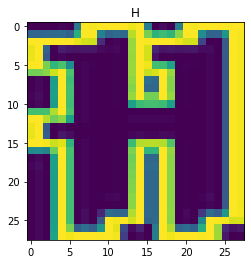

In [18]:
plt.imshow(all_images[365])
plt.title(all_classes[365])

In [19]:
all_images.min(), all_images.max()

(0, 255)

In [20]:
all_images_scaled = all_images / 255 # SCALER!!! 

In [21]:
train_images, test_images, train_classes, test_classes = train_test_split(
    all_images_scaled, all_classes, test_size=50, stratify=all_classes)

In [22]:
train_images.shape, test_images.shape

((450, 28, 28), (50, 28, 28))

In [23]:
pd.Series(all_classes).value_counts()

A    50
B    50
C    50
D    50
E    50
F    50
G    50
H    50
I    50
J    50
dtype: int64

In [24]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01568627, 0.        , 0.56078431,
        0.82745098, 0.6745098 , 0.73333333, 0.7254902 , 0.72941176,
        0.69803922, 0.68627451, 0.68627451, 0.68627451, 0.68627451,
        0.68627451, 0.68627451, 0.68627451, 0.68627451, 0.69803922,
        0.69803922, 0.8627451 , 0.69411765],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.3372549 , 0.49411765, 0.82352941,
        0.31764706, 0.01176471, 0.        , 0.00392157, 0.        ,
        0.08235294, 0.1254902 , 0.11764706, 0.11764706, 0.11764706,
        0.11764706, 0.11764706, 0.11764706, 0.1254902 , 0.10980392,
        0.        , 0.50980392, 0.51764706],
       [0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.03529412, 0.87843137, 1.        , 0.98039216,
        1.        , 0.32156863, 0.        , 0.00392157, 0.07058824,
        0.90980392, 1.    

In [25]:
train_images[0].shape #our data is matrix 28x28

(28, 28)

In [26]:
train_images[0].ravel().shape #we can reshape it to vector column 28x28=784

(784,)

In [27]:
train_images_vectors = train_images.reshape(len(train_images),-1)
test_images_vectors = test_images.reshape(len(test_images),-1)

In [28]:
train_images.reshape(len(train_images),-1).shape

(450, 784)

In [29]:
train_images_vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03137255, 0.42745098, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90588235, 0.98823529, 0.84705882, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87843137, 1.        , 0.99607843, ..., 0.99607843, 1.        ,
        0.87843137]])

<function matplotlib.pyplot.show(close=None, block=None)>

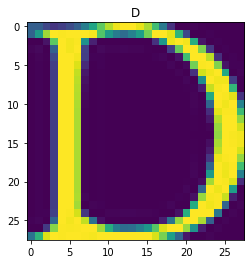

In [30]:
plt.imshow(train_images_vectors[365].reshape(28,28))
plt.title(train_classes[365])
plt.show

In [31]:
neural_network = MLPClassifier(hidden_layer_sizes=(10,), verbose=True)

In [32]:
#settings or hyperparameters for example in NN are hidden_layer_sizes=(10,), verbose=True

In [33]:
neural_network.fit(train_images_vectors, train_classes) #hyperparameters

Iteration 1, loss = 2.52581852
Iteration 2, loss = 2.35521277
Iteration 3, loss = 2.30689183
Iteration 4, loss = 2.26645433
Iteration 5, loss = 2.22285323
Iteration 6, loss = 2.18117975
Iteration 7, loss = 2.14487927
Iteration 8, loss = 2.09687573
Iteration 9, loss = 2.05347866
Iteration 10, loss = 2.01301138
Iteration 11, loss = 1.96779701
Iteration 12, loss = 1.92210063
Iteration 13, loss = 1.87713849
Iteration 14, loss = 1.82957740
Iteration 15, loss = 1.78222380
Iteration 16, loss = 1.73614875
Iteration 17, loss = 1.68494680
Iteration 18, loss = 1.63623726
Iteration 19, loss = 1.58358317
Iteration 20, loss = 1.53374998
Iteration 21, loss = 1.48332768
Iteration 22, loss = 1.43813410
Iteration 23, loss = 1.39457608
Iteration 24, loss = 1.35102759
Iteration 25, loss = 1.31123381
Iteration 26, loss = 1.27635674
Iteration 27, loss = 1.24148656
Iteration 28, loss = 1.20755670
Iteration 29, loss = 1.17889234
Iteration 30, loss = 1.14925421
Iteration 31, loss = 1.12433908
Iteration 32, los

C:\Users\Gaming PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), verbose=True)

In [34]:
neural_network.score(train_images_vectors, train_classes)

0.9777777777777777

In [35]:
neural_network.score(test_images_vectors, test_classes)

0.72

In [36]:
neural_network.coefs_[0].shape

(784, 10)

In [37]:
neural_network.coefs_[1].shape

(10, 10)